In [40]:
import pandas as pd
import pymongo
import json
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [41]:
#Get Connection string from JSON file
# Opening JSON file
json_file = open('C:\\Users\\stuar\\Downloads\\MongoDBConnection.json')
  
#Grab connection string
mongo_connection_string = json.load(json_file)['mongodb']

# Closing file
json_file.close() 

In [42]:
#Connect
da320_database = pymongo.MongoClient(mongo_connection_string)['metacritic']
 
# Access collection of the database
metacritic_data = da320_database['movies']

#Establish the connection
metacritic = pd.DataFrame(metacritic_data.find())

In [75]:
#Convert fields, and add calendar parts.  Month name from here: https://www.studytonight.com/python-howtos/how-to-get-month-name-from-month-number-in-python

metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month_name'] = metacritic.release_date.dt.month_name(locale = 'English')
metacritic.metascore = pd.to_numeric(metacritic.metascore)
metacritic.head()



,_id,title,release_date,description,metascore,image_url,year,month,month_name
0,6368517f58a1349c757e7be3,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12,December
1,6368517f58a1349c757e7be4,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10,October
2,6368517f58a1349c757e7be5,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3,March
3,6368517f58a1349c757e7be6,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9,September
4,6368517f58a1349c757e7be7,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6,June


## Average Movie Metascore by Year

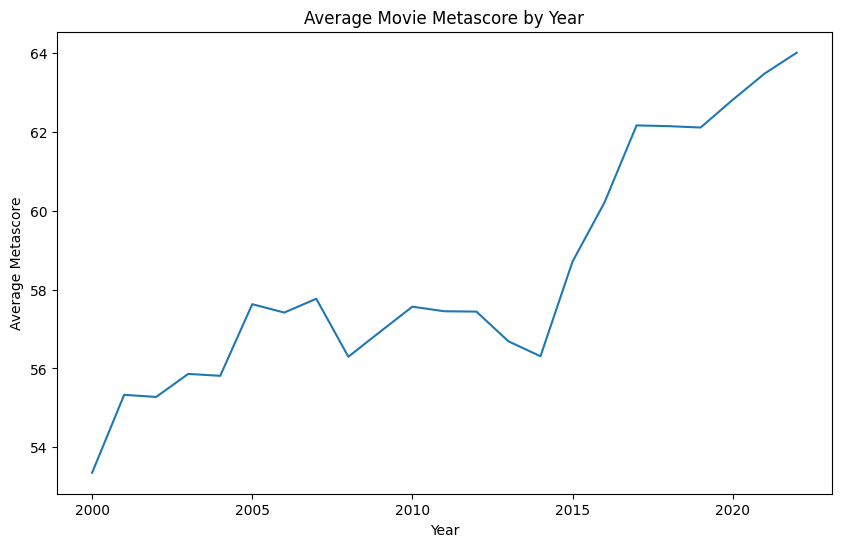

In [87]:
#Group by year, and get average score
metacritic_GroupByYear = metacritic.groupby(['year']).mean(['metascore'])

#make fig big
fig = plt.figure(figsize=(10, 6))

#Label axes
ax1 = fig.add_subplot()
ax1.set_ylabel('Average Metascore')
ax1.set_xlabel('Year')

# displaying the title
plt.title("Average Movie Metascore by Year")

#Plot average runtime against year
plt.plot(metacritic_GroupByYear['metascore'])

There is a very clear trend in rising scores over the years presented
Questions raised by graph:
- Is movie quality is increasing?
- Are critics are being less critical?
- When were these movies reviewed? (Were they reviewed at the time they came out, or more recently?)
- Is the age of the reviewer going to impact their impression of the movie based on the period in which the movie was produced?

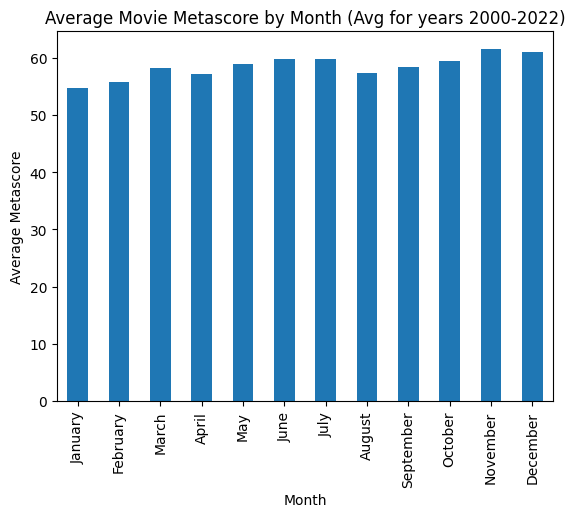

In [88]:
#For ordering in calendar order.  Method: https://stackoverflow.com/questions/65044978/how-do-i-sort-bar-chart-by-month-names
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']


result = metacritic.groupby('month_name').agg({'metascore': ['mean']}).reindex(months)

# Plot a bar chart using the DF
ax = result.plot(kind="bar")

# displaying the title
plt.title("Average Movie Metascore by Month (Avg for years 2000-2022)")

# Change the axes labels
ax.set_xlabel("Month")
ax.set_ylabel("Average Metascore")

#Remove the legend
ax.get_legend().remove()



There is a subtle trending increase over the course of the year, with a drop around Aug.
Questions raised by graph:
 - Is the Oscar season impacting the scores?
 - Is there a post-Oscars plunge in movie quality at the beginning of the year?
 - Could weather influence reviewer mood at certain times of the year, that could affect their scores?
 - Do more summer "blockbusters" come out in July than Aug?
